In [ ]:

from PyQt5.QtWidgets import (QApplication, QMainWindow, QPushButton, QPlainTextEdit,
                                QVBoxLayout, QWidget, QLabel)
from PyQt5.QtCore import QProcess
from PyQt5.QtGui import QIcon, QPixmap

import sys

import numpy as np
import matplotlib.pyplot as plt
import practice_library as ice
from random import *


class GBA(QMainWindow):

    def __init__(self):
        super().__init__()
        
        ## NAME AND ICON ##
        self.setWindowTitle('Pokemon Ice-cave Puzzle')
        self.setWindowIcon(QIcon('.\images\icon.png'))

        ## POSITION AND SIZE ##
        # 'self.setGeometry(1000, 300, 800, 1000)' / position and size
        self.move(1000, 300)
        self.resize(1000, 1000)
        
        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)
        lay = QVBoxLayout(self.central_widget)

        label = QLabel(self)
        pixmap = QPixmap('.\result_map\map.png')
        label.setPixmap(pixmap)
        self.resize(pixmap.width(), pixmap.height())
        
        lay.addWidget(label)
        self.btn = QPushButton("Execute")
        self.btn.pressed.connect(self.start_process)
        # self.text = QPlainTextEdit()
        # self.text.setReadOnly(True)

        l = QVBoxLayout()
        l.addWidget(self.btn)
        
#         l.addWidget(self.text)

        w = QWidget()
        w.setLayout(l)

        self.setCentralWidget(w)
#     def message(self, s) :
#        self.text.appendPlainText(s) 

    def start_process(self):
        # self.message("Executing process")
        game = Game()
        
        # self.message(" github.com/suhyuuk")
    
    def imageload(self) :
        pass

class Game():
    def __init__(self) :
                
        ########### < input > ##########
                
        tiledir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\self_tiles'
        savedir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\result_map'

        width = 6
        length = 5

        # top = 1, bottom = 2, left = 3, right = 4

        startpoint = [2, 3] 
        startpoint_place = 1

        endpoint = [3]
        endpoint_place = 4

        ##################################
        ##################################
        problemo = 1
        trial = 1
        print('trial = ', trial - 1, end = '\r')
        while problemo == 1 :
            problemo = 0

            #initial info
            startpoint, startpoint_maps, endpoint_maps, horizontal_all = ice.initinfo(startpoint, startpoint_place, endpoint, endpoint_place, width, length)

            endpoint = endpoint_maps[0]

            #initial horizontal
            horizontal_s = horizontal_all[0]
            horizontal_e = horizontal_all[1]


            #initial maps
            maps = np.zeros((length + 2, width + 2))
            maps[0, :] = 1
            maps[length + 1, :] = 1
            maps[:, 0] = 1
            maps[:, width + 1] = 1

            maps = maps.astype(int)

            for i in range(0, startpoint_maps.shape[0]):
                maps[startpoint_maps[i][0], startpoint_maps[i - 1][1]] = 2

            for i in range(0, endpoint_maps.shape[0]):
                maps[endpoint_maps[i][0], endpoint_maps[i - 1][1]] = 2

            maps[startpoint[0], startpoint[1]] = 3


            ## start
            now = startpoint.copy()
            horizontal = horizontal_s

            keep = 1
            joint = 0

            path = []
            mapplot_save_list = []
            mapplot_save_list.append(list(startpoint))
            rock_save_list = []

            while keep == 1:

                #save now
                now_latest = now.copy()
                maps_latest = maps.copy()

                #next tile
                stuck = 1
                stuck_trial = 0
                while stuck == 1:
                    # not stuck yet
                    stuck = 0

                    #next tile
                    now, maps, horizontal = ice.nextile(now, maps, horizontal)

                    # see if stuck
                    stuck = ice.imstuck(now, maps, horizontal)
                    if stuck == 1:
                        now = now_latest.copy()
                        maps = maps_latest.copy()
                    stuck_trial += 1
                    if stuck_trial > 100 :
                        stuck = 0
                        problemo = 1
                
                # draw maps
                mapplot_save_list = ice.mapplot_save(now, mapplot_save_list)

                # add path, path to maps
                # path, maps = ice.addpath(now, now_latest, maps, path)

                # swap horizontal
                if horizontal == 0:
                    horizontal = 1
                else: # horizontal = 1
                    horizontal = 0

                #joint
                joint = joint + 1

                #endcheck
                if joint > 5 :
                    end = ice.endcheck(now, maps, endpoint, horizontal)
                    if end == 1:
                        keep = 0
                
                if joint > 100 :
                    problemo = 1
                        
                if problemo == 1 :
                    keep = 0
            trial += 1
            print('trial = ', trial - 1, end = '\r')


        print("maps\n", maps)
        print("route", mapplot_save_list)
        mapplot_save_list.append(list(endpoint))
        ice.mapplot(width, length, maps, rock_save_list, mapplot_save_list)
        ice.tilemap(maps, tiledir, savedir)


app = QApplication(sys.argv)

w = GBA()
w.show()

app.exec_()


[[3 7]]
maps
 [[1 1 2 3 1 1 1 1]
 [1 0 1 0 0 0 0 1]
 [1 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 2]
 [1 1 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 3], [4, 3], [4, 5], [1, 5], [1, 3], [4, 3], [4, 2], [3, 2]]


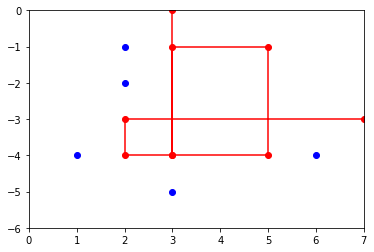

renewed maps [[2222 1111 1111    3 1111 1111 1111 4444]
 [2222    0    1    0    0    0    0 4444]
 [2222    0    1    0    0    0    0 4444]
 [2222    0    0    0    0    0    0    2]
 [2222    1    0    0    0    0    1 4444]
 [2222    0    0    1    0    0    0 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]
[[3 7]]  0
mapsl =  1
 [[1 1 1 3 1 1 1 1]
 [1 1 0 0 1 1 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 1 1]
 [1 0 0 1 1 0 0 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 3], [4, 3], [4, 1], [2, 1], [2, 6], [5, 6], [5, 5], [2, 5], [2, 1], [5, 1], [5, 2], [1, 2], [1, 3], [2, 3], [2, 6], [3, 6]]


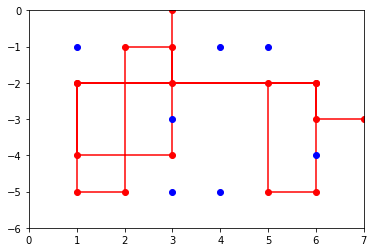

renewed maps [[2222 1111 1111    3 1111 1111 1111 4444]
 [2222    1    0    0    1    1    0 4444]
 [2222    0    0    0    0    0    0 4444]
 [2222    0    0    1    0    0    0    2]
 [2222    0    0    0    0    0    1 4444]
 [2222    0    0    1    1    0    0 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]
[[3 7]]  0
mapsl =  1
 [[1 1 3 2 1 1 1 1]
 [1 0 0 0 0 1 0 1]
 [1 1 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 1]
 [1 0 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 2], [5, 2], [5, 5], [2, 5], [2, 2], [4, 2], [4, 4], [5, 4], [5, 3], [3, 3]]


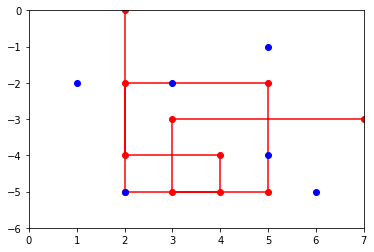

renewed maps [[2222 1111    3 1111 1111 1111 1111 4444]
 [2222    0    0    0    0    1    0 4444]
 [2222    1    0    1    0    0    0 4444]
 [2222    0    0    0    0    0    0    2]
 [2222    0    0    0    0    1    0 4444]
 [2222    0    1    0    0    0    1 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]
[[3 7]]  0
[[3 7]=  1
 [7 7]]
mapsl =  2
 [[2 1 3 1 1 1 1 1]
 [1 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 2]
 [1 0 1 0 1 0 0 1]
 [1 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 2], [2, 2], [2, 1], [1, 1], [1, 6], [4, 6], [4, 3], [2, 3], [2, 5], [1, 5], [1, 4], [3, 4]]


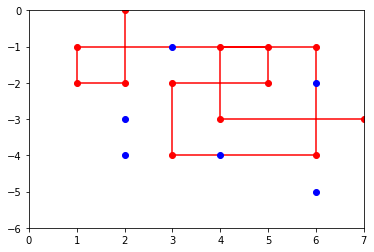

renewed maps [[1111 1111    3 1111 1111 1111 1111 4444]
 [2222    0    0    1    0    0    0 4444]
 [2222    0    0    0    0    0    1 4444]
 [2222    0    1    0    0    0    0    2]
 [2222    0    1    0    1    0    0 4444]
 [2222    0    0    0    0    0    1 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]
[[3 7]]  0
mapsl =  1
 [[1 1 3 2 1 1 1 1]
 [1 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 2], [5, 2], [5, 6], [2, 6], [2, 4], [5, 4], [5, 3], [3, 3]]


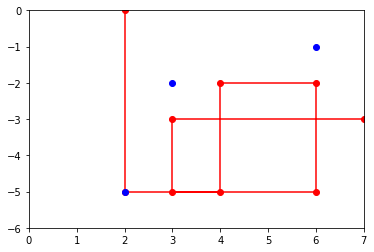

renewed maps [[2222 1111    3 1111 1111 1111 1111 4444]
 [2222    0    0    0    0    0    1 4444]
 [2222    0    0    1    0    0    0 4444]
 [2222    0    0    0    0    0    0    2]
 [2222    0    0    0    0    0    0 4444]
 [2222    0    1    0    0    0    0 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]
[[3 7]]  0
mapsl =  1
 [[1 1 3 2 1 1 1 1]
 [1 0 0 0 0 0 1 1]
 [1 0 1 1 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 1]
 [1 0 0 0 1 0 0 1]
 [1 1 1 1 1 1 1 1]]
route [[0, 2], [1, 2], [1, 5], [3, 5], [3, 6], [2, 6], [2, 4], [4, 4], [4, 1], [5, 1], [5, 3], [3, 3]]


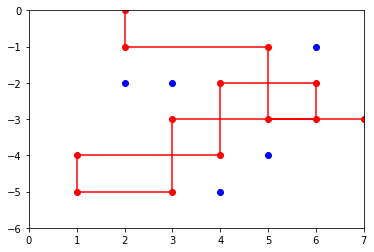

renewed maps [[2222 1111    3 1111 1111 1111 1111 4444]
 [2222    0    0    0    0    0    1 4444]
 [2222    0    1    1    0    0    0 4444]
 [2222    0    0    0    0    0    0 4444]
 [2222    0    0    0    0    1    0 4444]
 [2222    0    0    0    1    0    0 4444]
 [2222 3333 3333 3333 3333 3333 3333 4444]]


In [ ]:
from PyQt5.QtWidgets import (QApplication, QMainWindow, QPushButton, QPlainTextEdit,
                                QVBoxLayout, QWidget, QLabel)
from PyQt5.QtCore import QProcess
from PyQt5.QtGui import QIcon, QPixmap
from PIL import Image
import sys

import numpy as np
import matplotlib.pyplot as plt
import practice_library as ice
from random import *

import os

mapdir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\result_map'

class GBA(QMainWindow):

    def __init__(self):
        super().__init__()
        ## NAME AND ICON ##
        self.setWindowTitle('Pokécave')
        self.setWindowIcon(QIcon('.\images\icon.png'))

        ## POSITION AND SIZE ##
        # 'self.setGeometry(1000, 300, 800, 1000)' / position and size
        self.move(1000, 300)
        self.resize(1000, 1000)
        
        self.central_widget = QWidget()               
        self.setCentralWidget(self.central_widget)    
        lay = QVBoxLayout(self.central_widget)
        
        

        
        # btn to self.central_widget
        
        label = QLabel(self)
        os.chdir(mapdir)
        
        pixmap = QPixmap('map.png')
        label.setPixmap(pixmap)
        self.resize(pixmap.width(), pixmap.height())

        
        self.btn = QPushButton("GENERATE !")
        self.btn.pressed.connect(self.start_process)
        
        lay.addWidget(self.btn)
        lay.addWidget(label)
        self.show()
        
    def start_process(self):
        
        game = GAME()
#         self.changeimage(self)
    
#         pixmap = QPixmap('map.png')
#         label.setPixmap(pixmap)
#         self.resize(pixmap.width(), pixmap.height())


class GAME():
    def __init__(self) :
                
        ########### < input > ##########
                
        tiledir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\self_tiles'
        savedir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\result_map'

        width = 6
        length = 5

        # top = 1, bottom = 2, left = 3, right = 4

        startpoint = [2, 3] 
        startpoint_place = 1

        endpoint = [3]
        endpoint_place = 4

        ##################################
        ##################################
        problemo = 1
        trial = 1
        print('trial = ', trial - 1, end = '\r')
        while problemo == 1 :
            problemo = 0

            #initial info
            startpoint, startpoint_maps, endpoint_maps, horizontal_all = ice.initinfo(startpoint, startpoint_place, endpoint, endpoint_place, width, length)

            endpoint = endpoint_maps[0]

            #initial horizontal
            horizontal_s = horizontal_all[0]
            horizontal_e = horizontal_all[1]


            #initial maps
            maps = np.zeros((length + 2, width + 2))
            maps[0, :] = 1
            maps[length + 1, :] = 1
            maps[:, 0] = 1
            maps[:, width + 1] = 1

            maps = maps.astype(int)
            
            for i in range(0, startpoint_maps.shape[0]):
                maps[startpoint_maps[i][0], startpoint_maps[i - 1][1]] = 2

            print(endpoint_maps)
            maps[endpoint_maps[0, 0], endpoint_maps[0, 1]] = 2
#             for i in range(0, endpoint_maps.shape[0]):
#                 maps[endpoint_maps[i][0], endpoint_maps[i - 1][1]] = 2

            maps[startpoint[0], startpoint[1]] = 3


            ## start
            now = startpoint.copy()
            horizontal = horizontal_s

            keep = 1
            joint = 0

            path = []
            mapplot_save_list = []
            mapplot_save_list.append(list(startpoint))
            rock_save_list = []

            while keep == 1:

                #save now
                now_latest = now.copy()
                maps_latest = maps.copy()

                #next tile
                stuck = 1
                stuck_trial = 0
                while stuck == 1:
                    # not stuck yet
                    stuck = 0

                    #next tile
                    now, maps, horizontal = ice.nextile(now, maps, horizontal)

                    # see if stuck
                    stuck = ice.imstuck(now, maps, horizontal)
                    if stuck == 1:
                        now = now_latest.copy()
                        maps = maps_latest.copy()
                    stuck_trial += 1
                    if stuck_trial > 100 :
                        stuck = 0
                        problemo = 1
                
                # draw maps
                mapplot_save_list = ice.mapplot_save(now, mapplot_save_list)

                # add path, path to maps
                # path, maps = ice.addpath(now, now_latest, maps, path)

                # swap horizontal
                if horizontal == 0:
                    horizontal = 1
                else: #horizontal = 1
                    horizontal = 0

                #joint
                joint = joint + 1

                #endcheck
                if joint > 5 :
                    end = ice.endcheck(now, maps, endpoint, horizontal)
                    if end == 1:
                        keep = 0
                
                if joint > 100 :
                    problemo = 1
                        
                if problemo == 1 :
                    keep = 0
            trial += 1
            print('trial = ', trial - 1, end = '\r')


        print("maps\n", maps)
        print("route", mapplot_save_list)
        mapplot_save_list.append(list(endpoint))
        ice.mapplot(width, length, maps, rock_save_list, mapplot_save_list)
        ice.tilemap(maps, tiledir, savedir)



if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = GBA()
    ex.show()
    sys.exit(app.exec_())

In [1]:
        self.btn = QPushButton("Execute")
        self.btn.pressed.connect(self.start_process)
        # self.text = QPlainTextEdit()
        # self.text.setReadOnly(True)

        l = QVBoxLayout()
        l.addWidget(self.btn)
        
#         l.addWidget(self.text)

        w = QWidget()
        w.setLayout(l)

        self.setCentralWidget(w)

NameError: name 'QPushButton' is not defined

In [3]:
from PyQt5.QtWidgets import (QApplication, QMainWindow, QPushButton, QPlainTextEdit,
                                QVBoxLayout, QWidget, QLabel)
from PyQt5.QtCore import QProcess
from PyQt5.QtGui import QIcon, QPixmap
from PIL import Image
import sys

from PyQt5.QtGui import QFontDatabase
from PyQt5.QtGui import QFont
from PyQt5.QtCore import *

import numpy as np
import matplotlib.pyplot as plt
import practice_library as ice
from random import *

import os

maindir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle'
mapdir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\result_map'

class GBA(QMainWindow, QWidget, QtCore):

    def __init__(self):
        super().__init__()
        ## NAME AND ICON ##
        self.setWindowTitle('Pokécave')
        self.setWindowIcon(QIcon('.\images\icon.png'))

        ## POSITION AND SIZE ##
        # 'self.setGeometry(1000, 300, 800, 1000)' / position and size
        self.move(1000, 300)
        self.resize(1000, 1000)
        
        self.central_widget = QWidget()               
        self.setCentralWidget(self.central_widget)    
        lay = QVBoxLayout(self.central_widget)
        
        
        # QPixmap new
        
        # Pixmap instance 생성
        self.pixmap = QPixmape('.\result_map\map.png')
        
        # QLabel instance 생성
        self.label = QLabel(self)
        
        self.label.setPixmap(Self.pixmap)
        self.label.resize(self.pixmap.width(), self.pixmap.height())
        
#         label = QLabel(self)
#         os.chdir(mapdir)
        
#         self.pic = QLabel(self)
#         self.pic.setGeometry(10, 10, 800, 800)
#         self.pic.setPixmap(QPixmap('map.png'))
        
#         pixmap_o = QPixmap('map.png')
#         pixmap = pixmap_o.scaled(100, 100, self.Qt.KeepAspectRatio, self.Qt.FastTransformation)
#         label.setPixmap(pixmap)
#         self.resize(pixmap.width(), pixmap.height())

        
        self.btn = QPushButton("GENERATE !")
        self.btn.pressed.connect(self.start_process)
        
        lay.addWidget(self.btn)
        lay.addWidget(label)
        self.show()
        
    def start_process(self):
        
        game = GAME()
        
        os.chdir(mapdir)
#         self.pic.setPixmap(QtGui.QPixmap('map.png'))
#         self.changeimage(self)
    
#         pixmap = QPixmap('map.png')
#         label.setPixmap(pixmap)
#         self.resize(pixmap.width(), pixmap.height())


class GAME():
    def __init__(self) :
                
        ########### < input > ##########
                
        tiledir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\self_tiles'
        savedir = 'C:\\Users\\Stephen Kim\\Documents\\GitHub\\Pokemon-ice-cave-puzzle\\result_map'

        width = 6
        length = 5

        # top = 1, bottom = 2, left = 3, right = 4

        startpoint = [2, 3] 
        startpoint_place = 1

        endpoint = [3]
        endpoint_place = 4

        ##################################
        ##################################
        problemo = 1
        trial = 1
        print('trial = ', trial - 1, end = '\r')
        while problemo == 1 :
            problemo = 0

            #initial info
            startpoint, startpoint_maps, endpoint_maps, horizontal_all = ice.initinfo(startpoint, startpoint_place, endpoint, endpoint_place, width, length)

            endpoint = endpoint_maps[0]

            #initial horizontal
            horizontal_s = horizontal_all[0]
            horizontal_e = horizontal_all[1]


            #initial maps
            maps = np.zeros((length + 2, width + 2))
            maps[0, :] = 1
            maps[length + 1, :] = 1
            maps[:, 0] = 1
            maps[:, width + 1] = 1

            maps = maps.astype(int)
            
            for i in range(0, startpoint_maps.shape[0]):
                maps[startpoint_maps[i][0], startpoint_maps[i - 1][1]] = 2

            print(endpoint_maps)
            maps[endpoint_maps[0, 0], endpoint_maps[0, 1]] = 2
#             for i in range(0, endpoint_maps.shape[0]):
#                 maps[endpoint_maps[i][0], endpoint_maps[i - 1][1]] = 2

            maps[startpoint[0], startpoint[1]] = 3


            ## start
            now = startpoint.copy()
            horizontal = horizontal_s

            keep = 1
            joint = 0

            path = []
            mapplot_save_list = []
            mapplot_save_list.append(list(startpoint))
            rock_save_list = []

            while keep == 1:

                #save now
                now_latest = now.copy()
                maps_latest = maps.copy()

                #next tile
                stuck = 1
                stuck_trial = 0
                while stuck == 1:
                    # not stuck yet
                    stuck = 0

                    #next tile
                    now, maps, horizontal = ice.nextile(now, maps, horizontal)

                    # see if stuck
                    stuck = ice.imstuck(now, maps, horizontal)
                    if stuck == 1:
                        now = now_latest.copy()
                        maps = maps_latest.copy()
                    stuck_trial += 1
                    if stuck_trial > 100 :
                        stuck = 0
                        problemo = 1
                
                # draw maps
                mapplot_save_list = ice.mapplot_save(now, mapplot_save_list)

                # add path, path to maps
                # path, maps = ice.addpath(now, now_latest, maps, path)

                # swap horizontal
                if horizontal == 0:
                    horizontal = 1
                else: #horizontal = 1
                    horizontal = 0

                #joint
                joint = joint + 1

                #endcheck
                if joint > 5 :
                    end = ice.endcheck(now, maps, endpoint, horizontal)
                    if end == 1:
                        keep = 0
                
                if joint > 100 :
                    problemo = 1
                        
                if problemo == 1 :
                    keep = 0
            trial += 1
            print('trial = ', trial - 1, end = '\r')


        print("maps\n", maps)
        print("route", mapplot_save_list)
        mapplot_save_list.append(list(endpoint))
        ice.mapplot(width, length, maps, rock_save_list, mapplot_save_list)
        ice.tilemap(maps, tiledir, savedir)



if __name__ == '__main__':
    app = QApplication(sys.argv)
    
    fontDB = QFontDatabase()
    os.chdir(maindir)
    fontDB.addApplicationFont('.\font\DungGeunMo.ttf')
    app.setFont(QFont('DungGeunMo'))
    
    ex = GBA()
    ex.show()
    sys.exit(app.exec_())

NameError: name 'QtCore' is not defined